# Background
- **Author**: `<郭伊軒>`
- **Created At**: `<2025-11-1>`
- **Path to Training Data： discount-timing-DE.csv**
- **Path to Testing Data： discount-timing-DE.csv**
- **Model Specification 
    - Method：XGBoost classifer
    - Variables：  
    ['Age', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 'SalePeriod', 'AccumulatedPositiveRate', 'DLC_sum_1W', 'Sequel_sum_1W']
    - Tuning Parameters：
    - Optimization Method：
- **Main Findings and Takeaways：**
    - In-sample `<metric>`:
    - Out-sample `<metric>`:
- **Future Direciton：**

In [35]:
# Load packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix


In [22]:
# Load the TRAINING data here and please finish all the data manipulation here.
input_data_file = "/Users/10610/Desktop/114-1 資料/steam-project/discount-timing-DE.csv"
df = pd.read_csv(input_data_file)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Finish this block by printing the first ten observations of the data.
# Note:
# - You may only read data from /data/processed.
# - Files in /data/processed should already be cleaned and prepared for analysis.
# - Beyond simple filtering of observations or generating a small number of variables,
#   further data manipulation is not allowed. If more extensive changes are needed,
#   update the source data instead.


In [23]:
df['DiscountDuringSale'] = np.where(
    (df['DiscountOrNot'] == 1) & (df['SalePeriod'] == 1), 
    1, 
    0
)

df['DiscountOutOfSale'] = np.where(
    (df['DiscountOrNot'] == 1) & (df['SalePeriod'] == 0), 
    1, 
    0
)
survival = [294100, 108600, 242760, 457140, 376210, 233860, 323190, 644930]
df['TypeSurvival'] = np.where(
    df['GameID'].isin(survival),
    1,
    0
)
openWorld = [381210, 1091500, 108600, 242760, 244850, 376210, 233860]
df['TypeOpenWorld'] = np.where(
    df['GameID'].isin(openWorld),
    1,
    0
)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
GameID,23938.0,461376.742000,298559.181056,10.000000,244850.000000,431730.000000,644930.000000,1.145360e+06
MultiPlayer,23938.0,0.464241,0.498730,0.000000,0.000000,0.000000,1.000000,1.000000e+00
ConstantDiscount,23938.0,0.214387,0.410405,0.000000,0.000000,0.000000,0.000000,1.000000e+00
DiscountOrNot,23938.0,0.019885,0.139607,0.000000,0.000000,0.000000,0.000000,1.000000e+00
DiscountDuration,23938.0,0.221196,1.715483,0.000000,0.000000,0.000000,0.000000,3.200000e+01
Age,23938.0,7.634427,4.458471,2.389041,4.951370,6.323288,8.479452,2.484658e+01
AccumulatedPositiveRate,23938.0,0.928061,0.064186,0.738751,0.905517,0.953165,0.972651,9.929734e-01
SalePeriod,23938.0,0.146420,0.353534,0.000000,0.000000,0.000000,0.000000,1.000000e+00
DiscountDuringSale,23938.0,0.008647,0.092590,0.000000,0.000000,0.000000,0.000000,1.000000e+00
DiscountOutOfSale,23938.0,0.011237,0.105411,0.000000,0.000000,0.000000,0.000000,1.000000e+00


季節性1W

In [36]:
df_dummies = pd.get_dummies(df, columns=['GameID'], drop_first=True)

train = df_dummies[df_dummies['Date'] < '2025-01-01']
test = df_dummies[df_dummies['Date'] >= '2025-01-01']
# 應變數與自變數
y_train = train['DiscountDuringSale']
X_train = train[['Age', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 
                'SalePeriod', 'AccumulatedPositiveRate', 
                'DLC_sum_1W', 'Sequel_sum_1W'] +
               [col for col in df_dummies.columns if col.startswith('GameID_')]]
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

y_test = test['DiscountDuringSale']
X_test = test[['Age', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 
                'SalePeriod', 'AccumulatedPositiveRate', 
                'DLC_sum_1W', 'Sequel_sum_1W'] +
               [col for col in df_dummies.columns if col.startswith('GameID_')]]

for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = X_test[col].astype(int)

C:\Users\10610\AppData\Local\Temp\ipykernel_16896\1404214364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
C:\Users\10610\AppData\Local\Temp\ipykernel_16896\1404214364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
C:\Users\10610\AppData\Local\Temp\ipykernel_16896\1404214364.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [ ]:
# Load the TESTING data here and please finish all the data manipulation here.
# Finish this block by printing the first ten observations of the data.
X_train.describe().T

### The actual modeling starts below
For the remaining blocks, make sure you have followed the guidelines as specified in [專案資料夾結構、檔案命名與文件規範](https://docs.google.com/document/d/1sl6gEFMdmiGsiNjLe17UmZ30xKxq15U0Mb2B-Jvusxg/edit?tab=t.33iie8ybx7s4).


In [38]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    importance = model.get_booster().get_score(importance_type='weight')
    importance_df = pd.DataFrame({
        'Feature': importance.keys(),
        'Importance': importance.values()
    }).sort_values(by='Importance', ascending=False)

    print(importance_df)

    # 畫出重要性圖
    plt.figure(figsize=(8,6))
    plot_importance(model, importance_type='gain')
    plt.title("Feature Importance (gain)")
    plt.show()


    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion matrix:\n", cm)
    return {"Model": name, "Accuracy": acc, "F1": f1, "AUC": auc}

In [39]:
baseline_model = XGBClassifier(
    objective='binary:logistic',  # ✅ 二元分類常用
    eval_metric='auc',        # 或者 'auc'
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=71
)

pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
weighted_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=pos_weight,
    random_state=71
)

                     Feature  Importance
2      FollowersGrowthRate1W       746.0
1         PlayerGrowthRate1W       693.0
3   PositiveRateGrowthRate1W       660.0
5    AccumulatedPositiveRate       378.0
0                        Age       374.0
4                 SalePeriod        61.0
21             GameID_477160        30.0
20             GameID_457140        29.0
8              GameID_108600        25.0
14             GameID_323190        16.0
11             GameID_244210        13.0
15             GameID_367520        13.0
10             GameID_242760        13.0
17             GameID_381210        12.0
27             GameID_880940        11.0
13             GameID_294100        10.0
6                GameID_3590         9.0
26             GameID_814380         8.0
25             GameID_703080         7.0
19             GameID_431960         7.0
30            GameID_1145360         6.0
18             GameID_413150         6.0
7                GameID_4000         5.0
16             G

<Figure size 800x600 with 0 Axes>

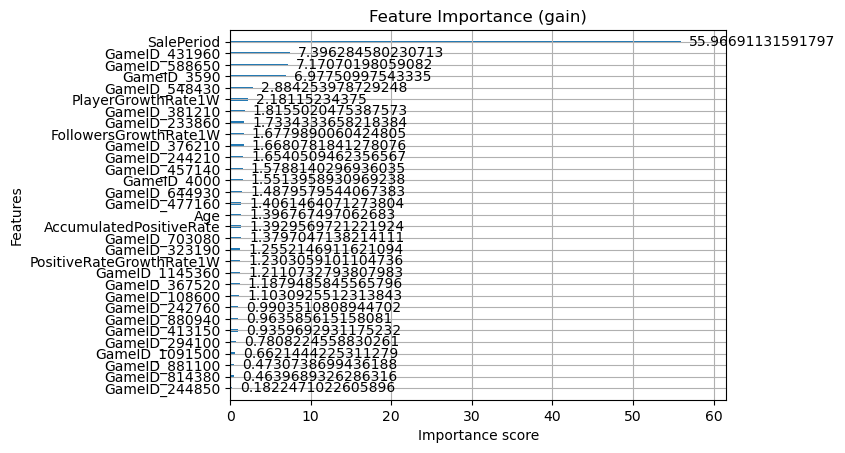

In [37]:
# Include the model specification here.  Please describe the model by stating, including
# type of method used, the variables included, the hyperparameters, and
# the method of optimization. 
# 建立遊戲虛擬變數 (GameID fixed effects)

model = XGBClassifier(
    objective='binary:logistic',  # ✅ 二元分類常用
    eval_metric='auc',        # 或者 'auc'
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=71
)

model.fit(X_train, y_train)

importance = model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# 畫出重要性圖
plt.figure(figsize=(8,6))
plot_importance(model, importance_type='gain')
plt.title("Feature Importance (gain)")
plt.show()



In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy = {acc:.3f}, F1 = {f1:.3f}, AUC = {auc:.3f}")
print(confusion_matrix(y_test, y_pred))

非季節性1W

In [40]:
y_train = train['DiscountOutOfSale']
X_train = train[['Age', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 
                'AccumulatedPositiveRate', 
                'DLC_sum_1W', 'Sequel_sum_1W'] +
               [col for col in df_dummies.columns if col.startswith('GameID_')]]
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

y_test = test['DiscountOutOfSale']
X_test = test[['Age', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 
                'AccumulatedPositiveRate', 
                'DLC_sum_1W', 'Sequel_sum_1W'] +
               [col for col in df_dummies.columns if col.startswith('GameID_')]]

for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = X_test[col].astype(int)


C:\Users\10610\AppData\Local\Temp\ipykernel_16896\2716359758.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
C:\Users\10610\AppData\Local\Temp\ipykernel_16896\2716359758.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
C:\Users\10610\AppData\Local\Temp\ipykernel_16896\2716359758.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

                     Feature  Importance
1         PlayerGrowthRate1W       893.0
3   PositiveRateGrowthRate1W       791.0
2      FollowersGrowthRate1W       744.0
0                        Age       509.0
4    AccumulatedPositiveRate       461.0
5                 DLC_sum_1W        27.0
24             GameID_880940        20.0
7              GameID_233860        20.0
8              GameID_242760        20.0
21             GameID_588650        19.0
19             GameID_548430        17.0
13             GameID_367520        17.0
9              GameID_244210        17.0
17             GameID_457140        16.0
10             GameID_244850        15.0
15             GameID_413150        10.0
16             GameID_431960         9.0
26            GameID_1091500         8.0
25             GameID_881100         6.0
18             GameID_477160         5.0
11             GameID_294100         4.0
6              GameID_108600         4.0
12             GameID_323190         2.0
14             G

<Figure size 800x600 with 0 Axes>

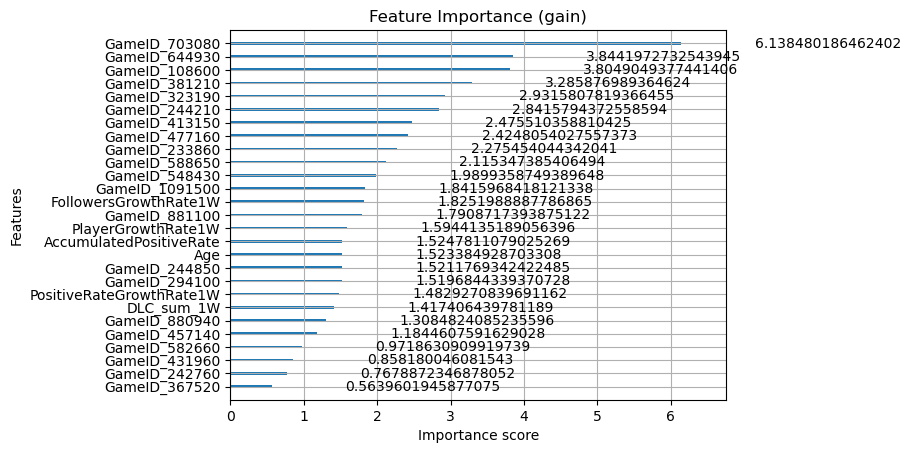


=== Baseline ===
Accuracy: 0.9864
F1-score: 0.0000
AUC: 0.6344
Confusion matrix:
 [[6729    0]
 [  93    0]]
                     Feature  Importance
1         PlayerGrowthRate1W      1001.0
3   PositiveRateGrowthRate1W       880.0
2      FollowersGrowthRate1W       842.0
0                        Age       655.0
4    AccumulatedPositiveRate       514.0
5                 DLC_sum_1W        48.0
26             GameID_880940        37.0
8              GameID_242760        37.0
22             GameID_588650        36.0
7              GameID_233860        27.0
10             GameID_244850        25.0
18             GameID_457140        23.0
6              GameID_108600        21.0
17             GameID_431960        21.0
27             GameID_881100        20.0
20             GameID_548430        18.0
25             GameID_814380        17.0
13             GameID_367520        16.0
9              GameID_244210        14.0
23             GameID_644930        13.0
12             GameID_323190 

<Figure size 800x600 with 0 Axes>

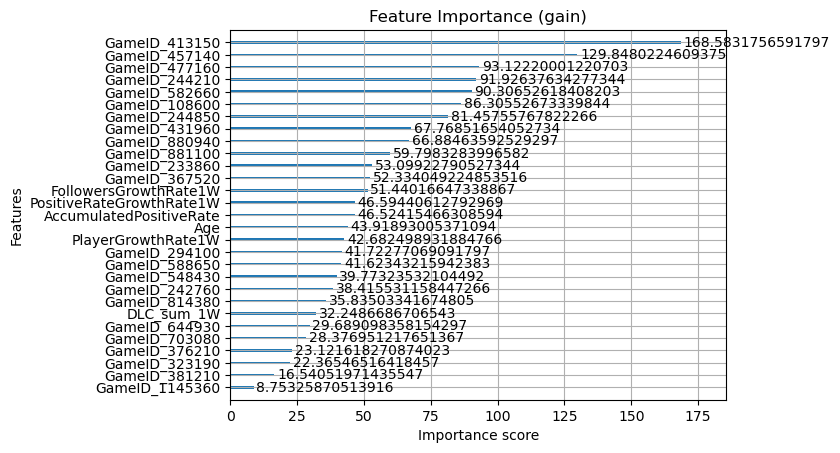


=== With scale_pos_weight ===
Accuracy: 0.9327
F1-score: 0.0296
AUC: 0.6112
Confusion matrix:
 [[6356  373]
 [  86    7]]

模型比較結果：
                   Model  Accuracy        F1       AUC
1  With scale_pos_weight  0.932718  0.029598  0.611200
0               Baseline  0.986368  0.000000  0.634414


In [41]:
result1 = evaluate_model("Baseline", baseline_model, X_train, y_train, X_test, y_test)
result2 = evaluate_model("With scale_pos_weight", weighted_model, X_train, y_train, X_test, y_test)

results = pd.DataFrame([result1, result2])
print("\n模型比較結果：")
print(results.sort_values(by="F1", ascending=False))

In [ ]:
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_pred_prob > 0.3).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy = {acc:.3f}, F1 = {f1:.3f}, AUC = {auc:.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy = 0.933, F1 = 0.030, AUC = 0.611
[[6356  373]
 [  86    7]]


預測DiscountOrNot

In [42]:
y_train = train['DiscountOrNot']
X_train = train[['Age', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 
                'SalePeriod', 'AccumulatedPositiveRate', 
                'DLC_sum_1W', 'Sequel_sum_1W'] +
               [col for col in df_dummies.columns if col.startswith('GameID_')]]
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

y_test = test['DiscountOrNot']
X_test = test[['Age', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 
                'SalePeriod', 'AccumulatedPositiveRate', 
                'DLC_sum_1W', 'Sequel_sum_1W'] +
               [col for col in df_dummies.columns if col.startswith('GameID_')]]

for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = X_test[col].astype(int)
 

C:\Users\10610\AppData\Local\Temp\ipykernel_16896\2162121132.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
C:\Users\10610\AppData\Local\Temp\ipykernel_16896\2162121132.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(int)
C:\Users\10610\AppData\Local\Temp\ipykernel_16896\2162121132.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

                     Feature  Importance
1         PlayerGrowthRate1W       989.0
2      FollowersGrowthRate1W       989.0
3   PositiveRateGrowthRate1W       946.0
0                        Age       653.0
5    AccumulatedPositiveRate       498.0
4                 SalePeriod       125.0
12             GameID_244210        32.0
6                 DLC_sum_1W        27.0
24             GameID_588650        24.0
11             GameID_242760        23.0
20             GameID_431960        23.0
21             GameID_457140        22.0
10             GameID_233860        20.0
23             GameID_548430        18.0
19             GameID_413150        17.0
22             GameID_477160        15.0
16             GameID_367520        15.0
9              GameID_108600        15.0
26             GameID_703080        14.0
28             GameID_880940        14.0
13             GameID_244850        13.0
7                GameID_3590         9.0
25             GameID_644930         8.0
30            Ga

<Figure size 800x600 with 0 Axes>

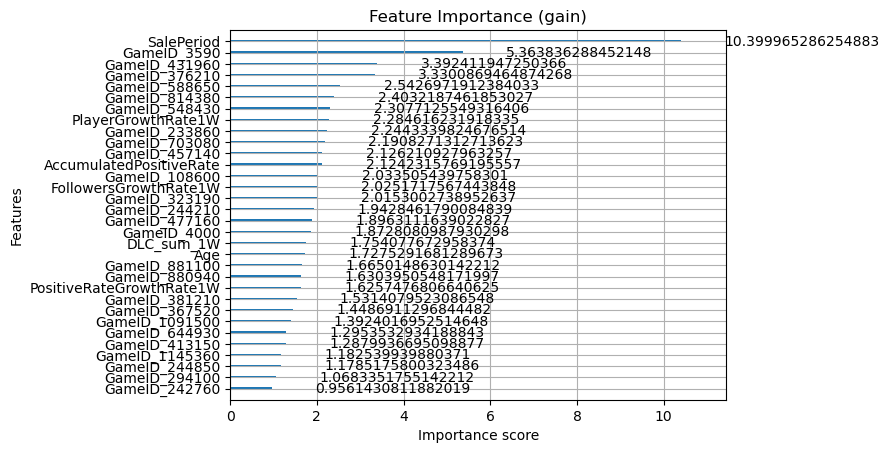


=== Baseline ===
Accuracy: 0.9815
F1-score: 0.0735
AUC: 0.6820
Confusion matrix:
 [[6691   10]
 [ 116    5]]
                     Feature  Importance
1         PlayerGrowthRate1W      1272.0
2      FollowersGrowthRate1W      1145.0
3   PositiveRateGrowthRate1W      1049.0
0                        Age       775.0
5    AccumulatedPositiveRate       579.0
4                 SalePeriod       344.0
21             GameID_457140        48.0
11             GameID_242760        48.0
20             GameID_431960        46.0
6                 DLC_sum_1W        39.0
29             GameID_880940        33.0
12             GameID_244210        30.0
25             GameID_588650        28.0
10             GameID_233860        25.0
15             GameID_323190        25.0
13             GameID_244850        24.0
16             GameID_367520        23.0
9              GameID_108600        22.0
23             GameID_548430        22.0
22             GameID_477160        21.0
27             GameID_703080 

<Figure size 800x600 with 0 Axes>

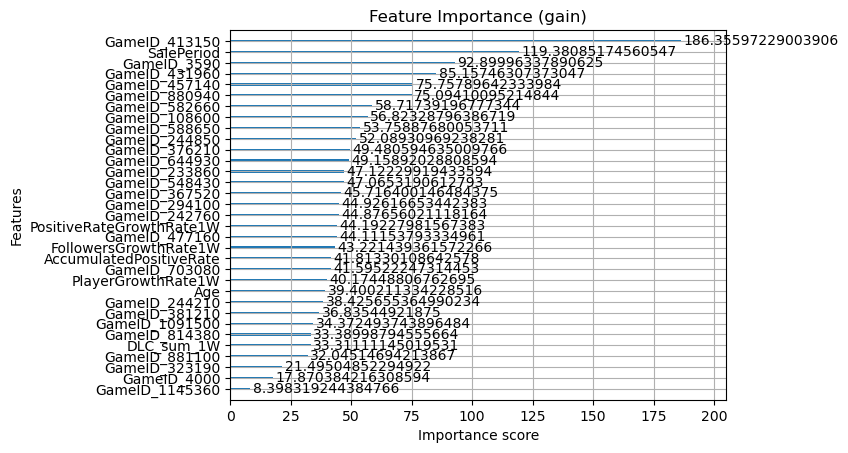


=== With scale_pos_weight ===
Accuracy: 0.8618
F1-score: 0.0617
AUC: 0.6538
Confusion matrix:
 [[5848  853]
 [  90   31]]

模型比較結果：
                   Model  Accuracy        F1       AUC
0               Baseline  0.981530  0.073529  0.681969
1  With scale_pos_weight  0.861771  0.061692  0.653819


In [43]:
result1 = evaluate_model("Baseline", baseline_model, X_train, y_train, X_test, y_test)
result2 = evaluate_model("With scale_pos_weight", weighted_model, X_train, y_train, X_test, y_test)

results = pd.DataFrame([result1, result2])
print("\n模型比較結果：")
print(results.sort_values(by="F1", ascending=False))
 

增加遊戲類別

In [44]:
# 應變數與自變數
y_train = train['DiscountOrNot']
X_train = train[['Age', "MultiPlayer", "TypeSurvival", 'TypeOpenWorld', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 
                'SalePeriod', 'AccumulatedPositiveRate', 
                'DLC_sum_1W', 'Sequel_sum_1W']]


y_test = test['DiscountOrNot']
X_test = test[['Age', "MultiPlayer", "TypeSurvival", 'TypeOpenWorld', 'PlayerGrowthRate1W', 'FollowersGrowthRate1W', 'PositiveRateGrowthRate1W', 
                'SalePeriod', 'AccumulatedPositiveRate', 
                'DLC_sum_1W', 'Sequel_sum_1W'] ]


                    Feature  Importance
4        PlayerGrowthRate1W      1068.0
6  PositiveRateGrowthRate1W       950.0
5     FollowersGrowthRate1W       939.0
0                       Age       786.0
8   AccumulatedPositiveRate       678.0
7                SalePeriod       114.0
2              TypeSurvival        35.0
3             TypeOpenWorld        35.0
1               MultiPlayer        34.0
9                DLC_sum_1W        27.0


<Figure size 800x600 with 0 Axes>

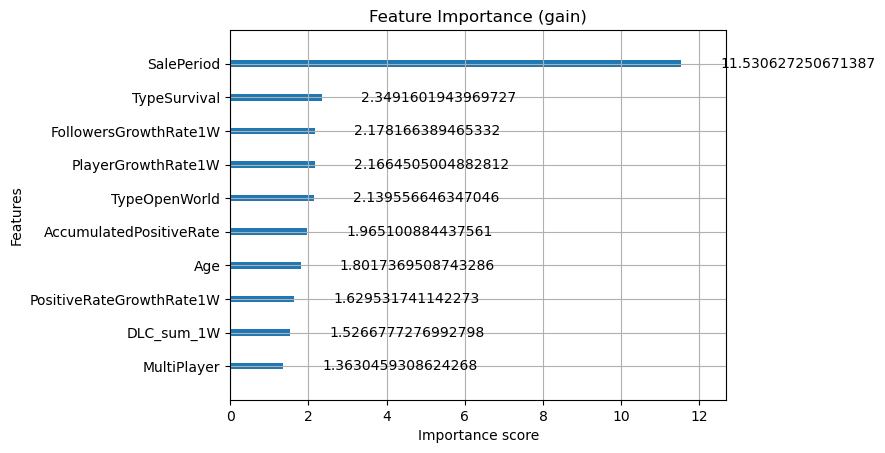


=== Baseline ===
Accuracy: 0.9804
F1-score: 0.0694
AUC: 0.6653
Confusion matrix:
 [[6683   18]
 [ 116    5]]
                    Feature  Importance
4        PlayerGrowthRate1W      1398.0
5     FollowersGrowthRate1W      1251.0
6  PositiveRateGrowthRate1W      1174.0
0                       Age       903.0
8   AccumulatedPositiveRate       851.0
7                SalePeriod       272.0
9                DLC_sum_1W        45.0
2              TypeSurvival        37.0
1               MultiPlayer        34.0
3             TypeOpenWorld        33.0


<Figure size 800x600 with 0 Axes>

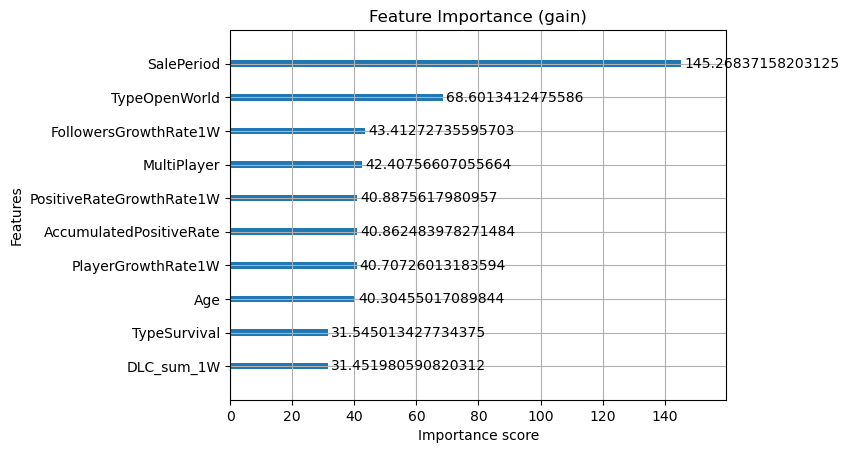


=== With scale_pos_weight ===
Accuracy: 0.8845
F1-score: 0.0708
AUC: 0.6434
Confusion matrix:
 [[6004  697]
 [  91   30]]

模型比較結果：
                   Model  Accuracy        F1       AUC
1  With scale_pos_weight  0.884491  0.070755  0.643381
0               Baseline  0.980358  0.069444  0.665307


In [45]:
result1 = evaluate_model("Baseline", baseline_model, X_train, y_train, X_test, y_test)
result2 = evaluate_model("With scale_pos_weight", weighted_model, X_train, y_train, X_test, y_test)

results = pd.DataFrame([result1, result2])
print("\n模型比較結果：")
print(results.sort_values(by="F1", ascending=False))